## Traffic Light Puzzle
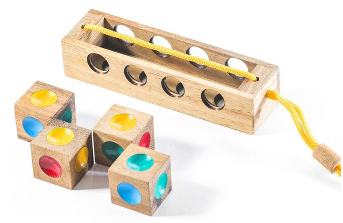

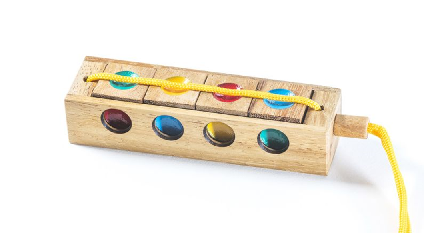


**In total, there are 82,944 ways of stacking these dice and there is only one solution.**


In [143]:
##Import required packages to use
from operator import itemgetter   
import pandas as pd

In [144]:

class RotateCube:
    '''Create a class function to turn a cube along any of the x-y-z axis'''
    def __init__(self, Cube):
        self.Cube = Cube

    def printcube(self):
        return self.Cube

    @classmethod
    def TurnDown(cls, cubename): 
        '''Rotates the cube down along x-axis. Once rotated, the top side of the cube 
        will be the front side'''
        ## "Front","Top", "Back",  "Bottom", "Left",  "Right" ##
        ##   0       1      2         3        4        5     ##
        Cube = cubename[1:4]+[cubename[0]]+cubename[4:6]
        return Cube
    
    @classmethod
    def TurnUp(cls, cubename):  
        '''Rotates the cube up along the x-axis. Once rotated, the bottom side of the cube 
        will be the front side'''
        Cube = list(itemgetter(3,2,1,0,4,5)(cubename))
        return Cube
    
    @classmethod
    def TurnRight(cls, cubename): 
        '''Rotates the cube right along the y-axis.Once rotated, the left side of the cube 
        will be the front side'''
        Cube = list(itemgetter(4,1,5,3,2,0)(cubename))
        return Cube
    
    @classmethod
    def TurnLeft(cls, cubename): 
        '''Rotates the cube left along the y-axis. Once rotated, the right side of the cube 
        will be the front side'''
        Cube = list(itemgetter(5,1,4,3,0,2)(cubename))
        return Cube

    @classmethod
    def TurnRight_Z(cls, cubename): 
        '''Rotates the cube right along the x-axis. Once rotated, the front and back sides remain
        the same, but the left side of the cube goes to the top side of the cube'''
        Cube = list(itemgetter(0,4,2,5,3,1)(cubename))
        return Cube

    @classmethod
    def TurnLeft_Z(cls, cubename): 
        '''Rotates the cube left along the x-axis. Once rotated, the front and back sides remain
        the same, but the right side of the cube goes to the top side of the cube'''
        Cube = list(itemgetter(0,5,2,4,1,3)(cubename))
        return Cube

In [145]:
## initialize each cube
   ## "Front","Top", "Back",  "Bottom", "Left",  "Right" ##
cube=[["Red",  "Red", "Red",   "Green",  "Blue",  "Yellow"],    ##cube 1
      ["Blue", "Red", "Red",   "Yellow", "Green", "Yellow"],    ##cube 2
      ["Blue", "Blue", "Red",  "Yellow", "Green", "Green"],     ##cube 3
      ["Red",  "Green","Green","Yellow", "Blue",  "Yellow"]]    ##cube 4

## Create an instance of each cube in our "RotateCube" Class
CubesClass=[RotateCube(cube[0]), RotateCube(cube[1]), RotateCube(cube[2]), RotateCube(cube[3])]

In [146]:
## For each cube, rotate 6 times using each the "classmethod" in the "RotateCube" class.  
CubeLayout=[[] for _ in range(0,4)]
for i in range(0,4):
    CubeLayout[i]=[RotateCube(RotateCube.TurnDown(CubesClass[i].Cube)),   RotateCube(RotateCube.TurnUp(CubesClass[i].Cube)),
          RotateCube(RotateCube.TurnLeft(CubesClass[i].Cube)) ,  RotateCube(RotateCube.TurnRight(CubesClass[i].Cube)),
          RotateCube(RotateCube.TurnLeft_Z(CubesClass[i].Cube)), RotateCube(RotateCube.TurnRight_Z(CubesClass[i].Cube))]

In [147]:
## From above, get every unique way we can display each cube. There are 24 unique rotations per cube. 
## NOTE: Because we are stacking the cubes side-by-side, the fouth cube only has 6 degrees of freedom rather 24. 

combo=[]
for h in range(0,4):
    for i in range(0,6):
        CubesClass[h]=CubeLayout[h][i]
        if h<3:
            for j in range(0,4):
                CubesClass[h]=RotateCube(RotateCube.TurnDown(CubesClass[h].Cube))
                combo.append(CubesClass[h].printcube())
        else:
            CubesClass[h]=CubesClass[h]
            combo.append(CubesClass[h].printcube())

Cube1_combo=combo[0:24]
Cube2_combo=combo[24:48]
Cube3_combo=combo[48:72]
Cube4_combo=combo[72:]

In [148]:
rotations=0
for i in range(0,6): ## This cube has 6 degrees of freedome.  
    for j in range(0,24): ## This cube has 24 degrees of freedome.  
        for k in range(0,24): ## This cube has 24 degrees of freedome.  
            for l in range(0,24): ## This cube has 24 degrees of freedome.
                '''Cycle through all possible cube orientations and check for a solution
                after each rotation.'''
                Check=[Cube1_combo[l]]+[Cube2_combo[k]]+[Cube3_combo[j]]+[Cube4_combo[i]]
                rotations+=1
                if ((len(set([Check[0][0],Check[1][0],Check[2][0],Check[3][0]]))==4) and   ## Front
                    (len(set([Check[0][1],Check[1][1],Check[2][1],Check[3][1]]))==4) and   ## Top
                    (len(set([Check[0][2],Check[1][2],Check[2][2],Check[3][2]]))==4) and   ## Back
                    (len(set([Check[0][3],Check[1][3],Check[2][3],Check[3][3]]))==4)):     ## Bottom
                
                    break ## break the loop if we find an orientation where each colour appreas 
                          ## once on each of the  4 sides.
            else:
                continue # Continue if the inner loop wasn't broken.
            break # only executed if the inner loop DID break
        else:
            continue # Continue if the inner loop wasn't broken.
        break # only executed if the inner loop DID break
    else:
        continue # Continue if the inner loop wasn't broken.
    break # only executed if the inner loop DID break     
    
## print the final layout of the four cubes
pd.DataFrame(Check,columns=["Front","Top","Back","Bottom","Left","Right"],
                index=["Cube 1","Cube 2","Cube 3", "Cube 4"])

,Front,Top,Back,Bottom,Left,Right
Cube 1,Red,Blue,Green,Yellow,Red,Red
Cube 2,Blue,Yellow,Red,Green,Red,Yellow
Cube 3,Yellow,Red,Blue,Blue,Green,Green
Cube 4,Green,Green,Yellow,Red,Blue,Yellow


In [150]:
print("In total, there are "+str(24*24*24*6)+" unique orientations")
print("\nNumber of positions per cube:", 
      "\n Cube 1:", i, 
      "\n Cube 2:", j+1,
      "\n Cube 3:", j*24+(k+1),
      "\n Cube 4:", (j*24+k)*24+(l+1))  

print("\nTotal number of orientations checked before reaching the solution:", rotations, 
      "("+"{0:.2%}".format(rotations/82944)+")")

In total, there are 82944 unique orientations

Number of positions per cube: 
 Cube 1: 0 
 Cube 2: 8 
 Cube 3: 188 
 Cube 4: 4497

Total number of orientations checked before reaching the solution: 4497 (5.42%)
